In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# $$T^2=\frac{4a^3\pi^2}{G(m_1+m_2)}$$

In [2]:
m1 = random.randint(2e+30,3e+30) #mass of star1 in kg
m2 = random.randint(2e+30,3e+30) #mass of star2 in kg
m=m1+m2
a  = random.randint(1e+11,200e+11) #separation in meters
G  = 6.67e-11
T=(np.sqrt(((a**3)*4*(np.pi)**2)/(G*m)))/(365*24*3600)
e=round(random.uniform(0.1,1),2) #eccentricity of the orbit
print(f'Mass of Star 1 : {m1:.2e} kg\nMass of Star 2 : {m2:.2e} kg\nTime period : {T:.2e} years \
       \nSemi Major axis (a1+a2) : {a:.2e} m\nEccentricity : {e}')

Mass of Star 1 : 2.62e+30 kg
Mass of Star 2 : 2.61e+30 kg
Time period : 6.74e+02 years        
Semi Major axis (a1+a2) : 1.59e+13 m
Eccentricity : 0.45


## Mean anomaly $\psi$ is the auxillary variable which is dependent on the auxillary circle circumscribing the elliptical orbit.
## Angle $\theta$ subtended by the object in the elliptical orbit can be related to $\psi$ by the following formula
## $$\tan\frac{\psi}{2}=\sqrt\frac{1+e}{1-e}\tan\frac{\theta}{2}$$

In [3]:
psi=[] #mean anomaly
for i in np.linspace(-np.pi,np.pi,360):
    psis=(2*np.arctan(np.sqrt((1-e)/(1+e))*(np.tan(i/2))))
    psi.append(psis)

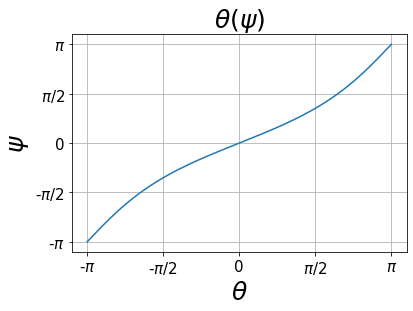

In [4]:
theta=np.linspace(-np.pi,np.pi,360)
ax=plt.gca()
ax.grid(True)

plt.title(r'$\theta$($\psi$)',size=25)
plt.xlabel(r'$\theta$',size=25)
plt.ylabel(r'$\psi$',size=25)
ax.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax.set_xticklabels([r'-$\pi$',r'-$\pi/2$',0,r'$\pi/2$',r'$\pi$'],fontdict={'fontsize': 15})
ax.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax.set_yticklabels([r'-$\pi$',r'-$\pi/2$',0,r'$\pi/2$',r'$\pi$'],fontdict={'fontsize': 15})
plt.plot(theta,psi)

plt.show()

## $$M=\frac{2\pi t}{T}$$
## Where M is the True Anomaly
## $$M=\psi-e\sin\psi$$
## $$t=\frac{T(\psi-e\sin\psi)}{2\pi}$$

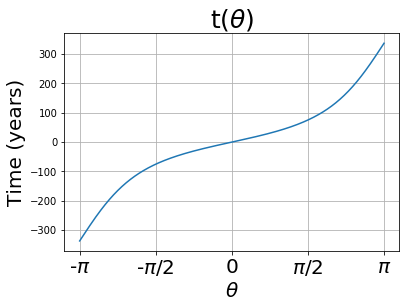

In [5]:
t=[] #time wrt theta
for j in range(len(psi)):
    tintheta=((T*(psi[j]-e*np.sin(psi[j])))/(2*np.pi))
    t.append(tintheta)
ax=plt.gca()
ax.grid(True)
ax.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax.set_xticklabels([r'-$\pi$',r'-$\pi/2$',0,r'$\pi/2$',r'$\pi$'],fontdict={'fontsize': 20})
plt.title(r't($\theta$)',size=25)
plt.xlabel(r'$\theta$',size=20)
plt.ylabel('Time (years)',size=20)
plt.plot(theta,t)

plt.show()

## $$r=\frac{a(1-e^2)}{1+e\cos\theta}$$
## $${v_1}^2=\frac{G{m_2}^2}{m_1+m_2}\left(\frac{2}{r}-\frac{1}{a}\right)$$
## $${v_2}^2=\frac{G{m_1}^2}{m_1+m_2}\left(\frac{2}{r}-\frac{1}{a}\right)$$

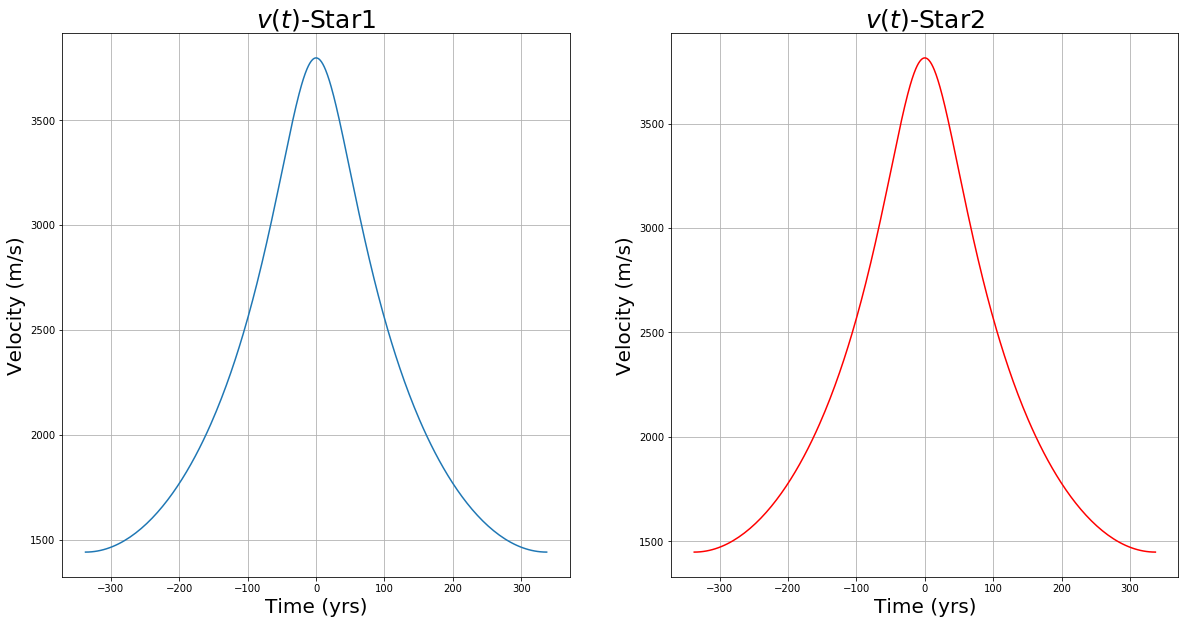

In [6]:
velocity1=[]
velocity2=[]
radius1=[]
radius2=[]
for j in range(len(theta)):
    r1=(a*(1-e**2))/(1+e*np.cos(theta[j]))
    radius1.append(r1)
    r2=(a*(1-e**2))/(1+e*np.cos(theta[j]))
    radius2.append(r2)

for k in range(len(radius1)):
    v1=np.sqrt((G*m2*m2/m)*((2/(radius1[k]))-(1/a)))
    velocity1.append(v1)
    v2=np.sqrt((G*m1*m1/m)*((2/radius2[k])-(1/a)))
    velocity2.append(v2)
    
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.grid(True)
ax2.grid(True)

ax1.plot(t,velocity1)
ax1.set_title(r'$v(t)$-Star1',size=25)
ax1.set_xlabel(r'Time (yrs)',size=20)
ax1.set_ylabel('Velocity (m/s)',size=20)
ax2.plot(t,velocity2,'-r')
ax2.set_title(r'$v(t)$-Star2',size=25)
ax2.set_xlabel(r'Time (yrs)',size=20)
ax2.set_ylabel('Velocity (m/s)',size=20)
plt.show()

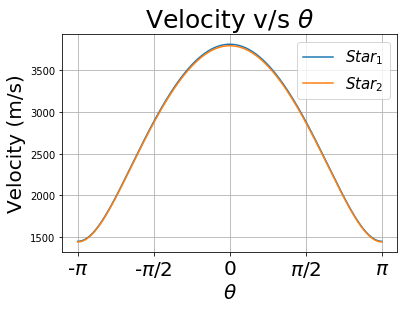

In [7]:
ax=plt.gca()
ax.grid(True)
plt.plot(theta,velocity2,label=r'$Star_1$')
plt.plot(theta,velocity1,label=r'$Star_2$')
ax.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax.set_xticklabels([r'-$\pi$',r'-$\pi/2$',0,r'$\pi/2$',r'$\pi$'],fontdict={'fontsize': 20})
plt.legend(prop={'size': 15})
plt.title(r"Velocity v/s $\theta$",size=25)
plt.ylabel("Velocity (m/s)",size=20)
plt.xlabel(r"$\theta$",size=20)
plt.show()

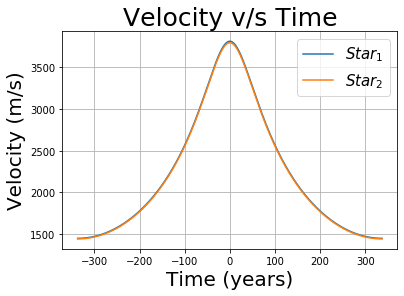

In [8]:
ax=plt.gca()
ax.grid(True)
plt.plot(t,velocity2,label=r'$Star_1$')
plt.plot(t,velocity1,label=r'$Star_2$')
plt.legend(prop={'size': 15})
plt.title("Velocity v/s Time",size=25)
plt.ylabel("Velocity (m/s)",size=20)
plt.xlabel("Time (years)",size=20)
plt.show()